# (Flight Delays)
## by (Vijay Raj Saravanan)

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
flights_data = pd.read_csv("2008.csv")

In [3]:
flights_data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

In [4]:
flights_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [ ]:
flights_data.duplicated().sum()

4

In [ ]:
flights_data.shape

(7009728, 29)

## Data Wrangling

### Quality Issues

<ul>
    <li>Duplicate rows exist</li>
    <li>Irregular column names</li>
    <li>Month, day, year to a single column</li>
    <li>deptime feature should be date time data type</li>
    <li>crsdeptime feature should be date time data type</li>
    <li>crsarrtime feature should be date time data type</li>
    <li>arrtime feature should be date time data type</li>
    <li>Null values in deptime feature</li>
    <li>Null values in arrtime feature</li>
    <li>Null values in tailnum feature</li>
    <li>Null values in actualelapsedtime feature</li>
    <li>Null values in crselapsedtime feature </li>
    <li>Null values in airtime feature</li>
    <li>Null values in arrdelay feature</li>
    <li>Null values in taxiin feature</li>
    <li>Null values in taxiout feature</li>
    <li>Null values in cancellationcode feature</li>
    <li>Null values in delay types</li>
    <li>Convert actualelapsedtime, crselapsedtime, airtime, arrdelay, depdelay, carrierdely, weatherdelay, nasdelay, securitydelay, lateaircraftdelay features to hours</li>
</ul>    

### Remove duplicate rows

In [3]:
flights_data.drop_duplicates(inplace=True)
flights_data.duplicated().sum()

0

### Remove null values in deptime


In [ ]:
flights_data.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872290
Diverted                   0
CarrierDelay         5484991
WeatherDelay         5484991
NASDelay             5484991
SecurityDelay        5484991
LateAircraftDelay    5484991
dtype: int64

### Standardize column names

In [4]:
default_cols = list(flights_data.columns)
lower_colnames = [name.lower() for name in default_cols]
flights_data.columns = lower_colnames

In [5]:
flights_data.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

### Convert categorical variables to category datatype

In [6]:
flights_data["cancellationcode"] = flights_data.cancellationcode.astype('category')
flights_data["dest"] = flights_data.dest.astype('category')
flights_data["origin"] = flights_data.origin.astype('category')
flights_data["uniquecarrier"] = flights_data.uniquecarrier.astype('category')
flights_data[["cancellationcode", "dest", "origin", "uniquecarrier"]].dtypes

cancellationcode    category
dest                category
origin              category
uniquecarrier       category
dtype: object

### Convert day, month, year to single column "date"

In [7]:
#Create a date column insted of 3 columns
flights_data.rename(columns={"dayofmonth":"day"}, inplace=True)
flights_data["date"] = pd.to_datetime(flights_data[["year", "month", "day"]])
flights_data.drop(["year", "month", "day"], axis=1, inplace=True)
flights_data.columns

Index(['dayofweek', 'deptime', 'crsdeptime', 'arrtime', 'crsarrtime',
       'uniquecarrier', 'flightnum', 'tailnum', 'actualelapsedtime',
       'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest',
       'distance', 'taxiin', 'taxiout', 'cancelled', 'cancellationcode',
       'diverted', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay', 'date'],
      dtype='object')

### Convert deptime, arrtime, crsdeptime, crsarrtime to date time data type

In [8]:
#Converting to date time dtyps
def convert_to_datetime(data):
    if np.isnan(data):
        return data
    else:
        replaced_string = str(data).replace(".0", "")
        if(len(replaced_string) < 4):
            return replaced_string.zfill(4)
        else:
            if replaced_string == "2400":
                return "0000"
            else:
                return replaced_string



In [9]:
flights_data["deptime"] = flights_data.deptime.apply(convert_to_datetime)
flights_data["arrtime"] = flights_data.arrtime.apply(convert_to_datetime)
flights_data["crsdeptime"] = flights_data.crsdeptime.apply(convert_to_datetime)
flights_data["crsarrtime"] = flights_data.crsarrtime.apply(convert_to_datetime)
flights_data["deptime"] = pd.to_datetime(flights_data["deptime"], format="%H%M")
flights_data["arrtime"] = pd.to_datetime(flights_data["arrtime"], format="%H%M")
flights_data["crsdeptime"] = pd.to_datetime(flights_data["crsdeptime"], format="%H%M")
flights_data["crsarrtime"] = pd.to_datetime(flights_data["crsarrtime"], format="%H%M")


In [10]:
flights_data[["arrtime","deptime","crsdeptime","crsarrtime"]].dtypes

arrtime       datetime64[ns]
deptime       datetime64[ns]
crsdeptime    datetime64[ns]
crsarrtime    datetime64[ns]
dtype: object

### Remove records that do not have enough information to reconstruct null values in other features

In [45]:
remove_indexes = list(flights_data[((flights_data.arrtime.isna())& (flights_data.actualelapsedtime.isna())) | \
             ((flights_data.actualelapsedtime.isna()) &(flights_data.deptime.isna()))].index)
# flights_data["test"] = (flights_data.arrtime - flights_data.crsarrtime).dt.total_seconds().div(60).astype(int)
# flights_data[["arrdelay", "test"]]
flights_data = flights_data.drop(remove_indexes)





7009724
6858075


In [52]:
flights_data.airtime.fillna(flights_data.airtime.mean(),inplace=True)
flights_data.airtime.isna().sum()

0

In [ ]:
print("Feature - airtime")
print("Max => {}".format(flights_data.airtime.max()))
print("Min => {}".format(flights_data.airtime.min()))
print("Mean => {}".format(flights_data.airtime.mean()))
print("Median => {}".format(np.median(flights_data[flights_data.airtime.notna()]\
                                     ["airtime"])))
print("90th percentile => {}".format(np.percentile(flights_data[flights_data.airtime.notna()]\
                                     ["airtime"], 90)))

In [54]:
flights_data.sample(5)

,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,date
713584,2,1900-01-01 08:54:00,1900-01-01 08:55:00,1900-01-01 10:03:00,1900-01-01 09:53:00,XE,2135,N14959,2.150000,1.966667,...,0.516667,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-12
5242647,3,1900-01-01 15:34:00,1900-01-01 14:50:00,1900-01-01 16:45:00,1900-01-01 16:19:00,NW,1207,N321NB,1.183333,1.483333,...,0.166667,0,NaN,0,0.433333,0.0,0.0,0.0,0.0,2008-09-03
1601189,4,1900-01-01 06:51:00,1900-01-01 06:55:00,1900-01-01 07:47:00,1900-01-01 08:10:00,MQ,4803,N857AE,0.933333,1.250000,...,0.300000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-03-13
2990552,3,1900-01-01 20:38:00,1900-01-01 20:40:00,1900-01-01 21:59:00,1900-01-01 22:11:00,DL,1009,N126DL,1.350000,1.516667,...,0.350000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-05-14
2272929,5,NaT,1900-01-01 15:30:00,NaT,1900-01-01 18:05:00,AA,608,NaN,2.122040,2.583333,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-04-25


In [38]:
temp = flights_data.sample(10)
temp["test"] = (temp.arrtime - temp.crsarrtime).dt.total_seconds().div(60).astype(int)
temp[["arrtime", "crsarrtime", "arrdelay", "test"]]


,arrtime,crsarrtime,arrdelay,test
6050976,1900-01-01 19:06:00,1900-01-01 19:20:00,-14.0,-14
5112153,1900-01-01 20:12:00,1900-01-01 20:25:00,-13.0,-13
1259388,1900-01-01 21:15:00,1900-01-01 21:00:00,15.0,15
2649636,1900-01-01 17:18:00,1900-01-01 17:20:00,-2.0,-2
4537358,1900-01-01 11:12:00,1900-01-01 09:50:00,82.0,82
1020072,1900-01-01 23:09:00,1900-01-01 23:22:00,-13.0,-13
3730793,1900-01-01 16:05:00,1900-01-01 16:15:00,-10.0,-10
2477991,1900-01-01 12:19:00,1900-01-01 12:25:00,-6.0,-6
5551915,1900-01-01 14:32:00,1900-01-01 14:22:00,10.0,10
6571805,1900-01-01 16:52:00,1900-01-01 16:55:00,-3.0,-3



### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'Flights in each month')

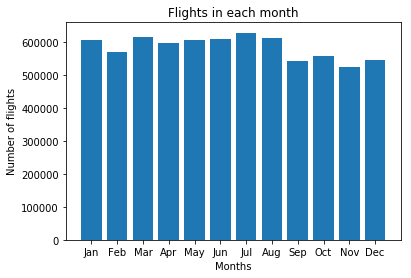

In [44]:
flights_date_indexed = flights_data.copy()
flights_date_indexed.index = flights_date_indexed["date"]
flights_months = flights_data.groupby(flights_date_indexed.index.month).distance.count()
plt.bar(range(1, 13), flights_months)
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months_ticks = np.arange(1, 13, 1)
plt.xticks(months_ticks, months_labels)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title("Flights in each month")


Number of flights are increasing by each year. In the year 1987, there seems to be a very small number of flights comparitively. This needs to looked into much deeper

There seems to be very few flights in Februaries that needs to be looked into further. Other than There seems to be a large number of flights in December, October and August.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27616fd0>,
      dtype=object)

<Figure size 864x504 with 0 Axes>

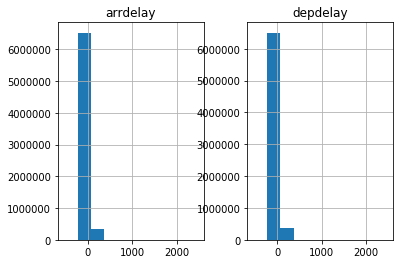

In [19]:
plt.figure(figsize=(12,7))
flights_data[["arrdelay", "depdelay"]].hist()


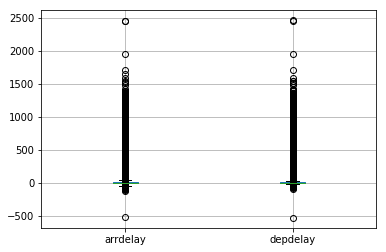

In [ ]:
flights_data.boxplot(column=["arrdelay", "depdelay"])

There appear to be a lot of outliers in arrival and departure delays

Text(0, 0.5, 'Number of flights')

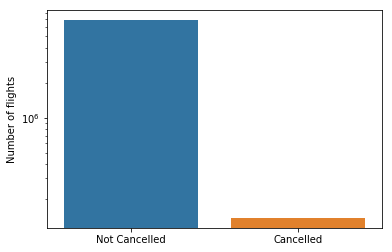

In [ ]:
# cancelled_flights = flights_data.query("Cancelled == 0")["CancellationCode"]
sb.countplot(data=flights_data, x="cancelled")
plt.yscale("log")
plt.xticks([0,1], ["Not Cancelled", "Cancelled"])
plt.xlabel("")
plt.ylabel("Number of flights")

Text(0, 0.5, 'Number of flights')

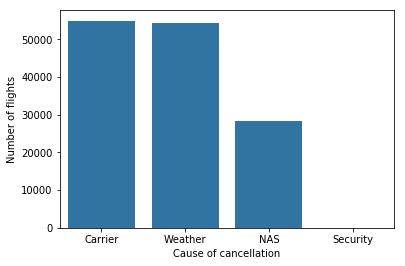

In [ ]:

cancel_order = flights_data.cancellationcode.value_counts().index
sb.countplot(data=flights_data, x="cancellationcode", order=cancel_order, color=sb.color_palette()[0])
cancelCode_xticks = np.arange(0,4,1)
cancelCode_xticklabels = ["Carrier", "Weather", "NAS", "Security"]
plt.xticks(cancelCode_xticks, cancelCode_xticklabels)
plt.xlabel("Cause of cancellation")
plt.ylabel("Number of flights")

It seems like a large number of the flights were cancelled due to carrier and weather wherase only a very few was cancelled due to security issues.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [45]:
#Plot matrix for scatter plots
scatterplot_matrix = sb.PairGrid(data=flights_data, vars = ["deptime", "arrtime", "crsarrtime",\
                                                            "actualelapsedtime", "crselapsedtime", "airtime", \
                                                            "arrdelay", "depdelay", "distance"])
scatterplot_matrix.map_diag(plt.hist)
scatterplot_matrix.map_offdiag(plt.scatter)

/Users/command/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/command/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


TypeError: invalid type promotion

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11e3b8620> (for post_execute):


ValueError: view limit minimum -9.899080460221458e+18 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -9.899080460221458e+18 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!